## Check if we're using GPU OR CPU

In [1]:
import tensorflow as tf 

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

Name: /physical_device:GPU:0   Type: GPU


## Listing Devices including GPU's with Tensorflow

In [2]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17857574766034335045
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14417788928
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12029288716903048171
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


## To Check GPU in Tensorflow


In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

# 1) Loading Dataset

In [4]:
#To Load Datasets
from tensorflow.keras.datasets import mnist 

#load the MNIST training and test dataset 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


# 2) Inspecting our Dataset 

In [5]:
#Display the number of samples in x_train, x_test, y_train, y_test 
print('The shape or dimensions of x_train', str(x_train.shape))

#Print the number of samples in our data 
print('Number of samples in training data: ', str(len(x_train)))
print('Number of labels in training data: ', str(len(y_train)))
print('Number of samples in test data: ', str(len(x_test)))
print('Number of labels in test data: ', str(len(y_test)))

The shape or dimensions of x_train (60000, 28, 28)
Number of samples in training data:  60000
Number of labels in training data:  60000
Number of samples in test data:  10000
Number of labels in test data:  10000


# 3) Visualizing our image dataset

<Figure size 432x288 with 0 Axes>

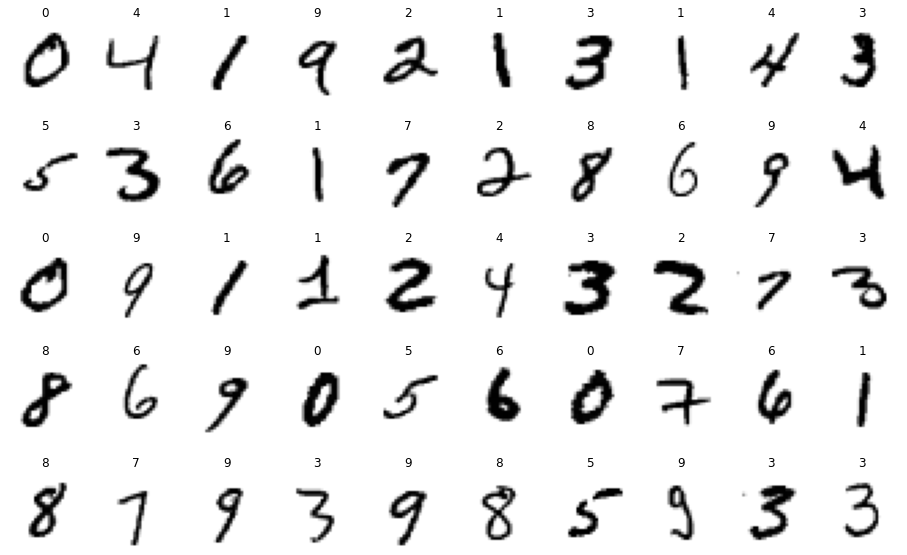

In [6]:
# Let's view the 50 first images of the MNIST training dataset
import matplotlib.pyplot as plt

# Create figure and change size
figure = plt.figure()
plt.figure(figsize=(16,10))

# Set how many images we wish to see
num_of_images = 50 

# iterate index from 1 to 51
for index in range(1, num_of_images + 1):
    plt.subplot(5, 10, index).set_title(f'{y_train[index]}')
    plt.axis('off')
    plt.imshow(x_train[index], cmap='gray_r')

# 4) Preprocessing 

In [7]:
#Let's store the number of rows and columns 
img_rows = x_train[0].shape[0]
img_columns = x_train[0].shape[1]

#Getting our data in the right shape needed for keras 
#We need to add a 4th dimension to our data thereby changing our 
#Original image shape of (60000, 28, 28) to (60000, 28, 28, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_columns, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_columns, 1)

#store the shape of a single image 
input_shape = (img_rows, img_columns, 1)

#change our image type to float32 data type 
x_train = x_train.astype('float32') #uint8 originally 
x_test = x_test.astype('float32')

#Normalize our data by changing the range from (0:255) to (0:1)
x_train /= 255.0
x_test /= 255.0

print('x_train shape: ', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

print(img_rows, img_columns)

x_train shape:  (60000, 28, 28, 1)
60000 train samples
10000 test samples
28 28


## One-Hot Encoding (y-labels)

In [8]:
from tensorflow.keras.utils import to_categorical

#Now we one hot encode outputs 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#Let's count thee number of columns in our hot encoded matrix 
print("Number of classes: ", str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

Number of classes:  10


In [9]:
#Look at our raw data
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# 5) Building Convolutional Neural Network

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten 
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD 

model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', strides = (2,2)))
model.add(MaxPooling2D(pool_size = (2, 2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = SGD(0.001), metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 6, 64)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               295040    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

# 6) Training The Model

In [11]:
batch_size = 128
epochs = 25

import time

start = time.time()

history = model.fit(x_train,
                    y_train, 
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose = 0)
print('Test Loss: ', score[0])
print('Test Accuracy: ', score[1])
print("Total time: ", time.time() - start, "seconds") 

Epoch 1/25
469/469 [==============================] - 12s 7ms/step - loss: 2.2924 - accuracy: 0.1042 - val_loss: 2.2638 - val_accuracy: 0.2098
Epoch 2/25
469/469 [==============================] - 3s 5ms/step - loss: 2.2275 - accuracy: 0.3190 - val_loss: 2.1767 - val_accuracy: 0.4447
Epoch 3/25
469/469 [==============================] - 3s 6ms/step - loss: 2.0859 - accuracy: 0.5241 - val_loss: 1.9414 - val_accuracy: 0.6283
Epoch 4/25
469/469 [==============================] - 3s 6ms/step - loss: 1.6710 - accuracy: 0.6790 - val_loss: 1.3043 - val_accuracy: 0.7440
Epoch 5/25
469/469 [==============================] - 3s 5ms/step - loss: 1.0118 - accuracy: 0.7769 - val_loss: 0.7547 - val_accuracy: 0.8165
Epoch 6/25
469/469 [==============================] - 3s 5ms/step - loss: 0.6619 - accuracy: 0.8308 - val_loss: 0.5547 - val_accuracy: 0.8534
Epoch 7/25
469/469 [==============================] - 3s 6ms/step - loss: 0.5291 - accuracy: 0.8543 - val_loss: 0.4704 - val_accuracy: 0.8718
Epoch

In [12]:
print('Test Accuracy: ', score[1]*100)

Test Accuracy:  92.94000267982483


# 7) Ploting Loss and Accuracy

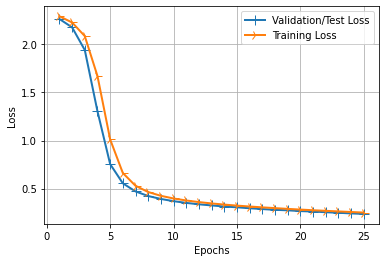

In [13]:
# Plotting our loss charts
import matplotlib.pyplot as plt

# Use the History object we created to get our saved performance results
history_dict = history.history

# Extract the loss and validation losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Get the number of epochs and create an array up to that number using range()
epochs = range(1, len(loss_values) + 1)

# Plot line charts for both Validation and Training Loss
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

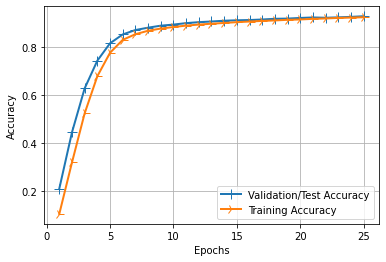

In [14]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

313/313 [==============================] - 1s 2ms/step


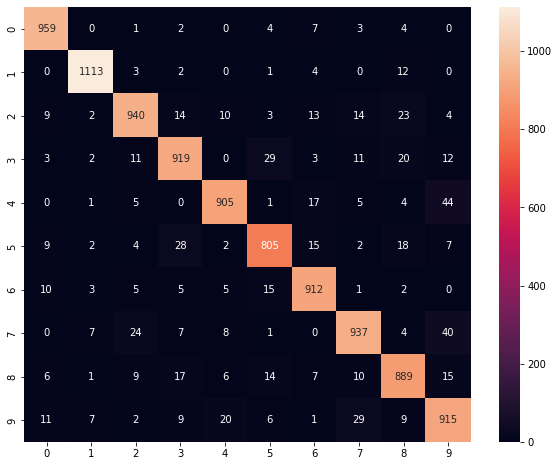

In [15]:
import numpy as np
import seaborn as sns 

# Predict the values from the testing dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert testing observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes) 

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')